Step 1: Build a neural network that will act as a a sign language classifier. The goal is to produce a model that accepts a picture of a hand as input and outputs a letter.

In [164]:
#Import necessary dependencies#
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



Let us create a data set from scratch, using.jpg images. 

In [202]:
#Let's import the dataset#
train_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_train/sign_mnist_train.csv")
test_df = pd.read_csv("/home/kiri/ASL_Translator/Data/sign_mnist_test/sign_mnist_test.csv")

#Print data frames to confirm we've pulled the correct things into the python code#
#print (train_df)
#print (test_df)

y_train = train_df['label']
y_test = test_df['label']
train_df.drop(['label'], axis=1, inplace=True)
test_df.drop(['label'], axis=1, inplace=True)

In [206]:
#Reshape data set
x_train = x_train / 255
x_test = x_test / 255
x_train = train_df.values.reshape(train_df.shape[0], 28,28,1)
x_test = test_df.values.reshape(test_df.shape[0], 28,28,1)
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (27455, 28, 28, 1)
x_test shape: (7172, 28, 28, 1)


/tmp/ipykernel_20090/3006423818.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


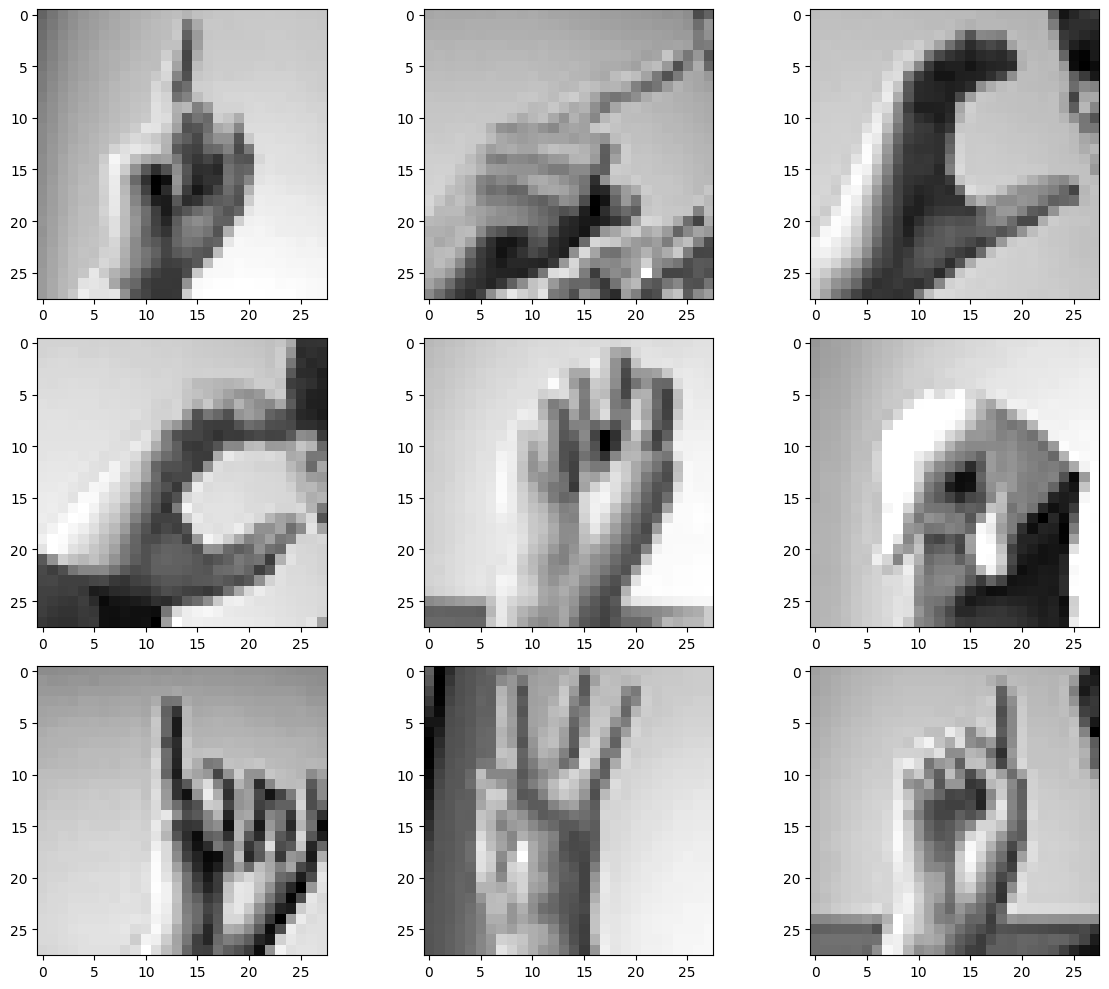

In [211]:
#Plot the first 9 images in the data set#
f, ax = plt.subplots(3,3) 
f.set_size_inches(12, 10)
k = 0
for i in range(3):
    for j in range(3):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

This data set is rather small, so let's generate more input by randomly changing the data we do have.

In [212]:
data_augmentation = ImageDataGenerator(
    rotation_range=10,
    zoom_range = 0.1, 
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
)
data_augmentation.fit(x_train)


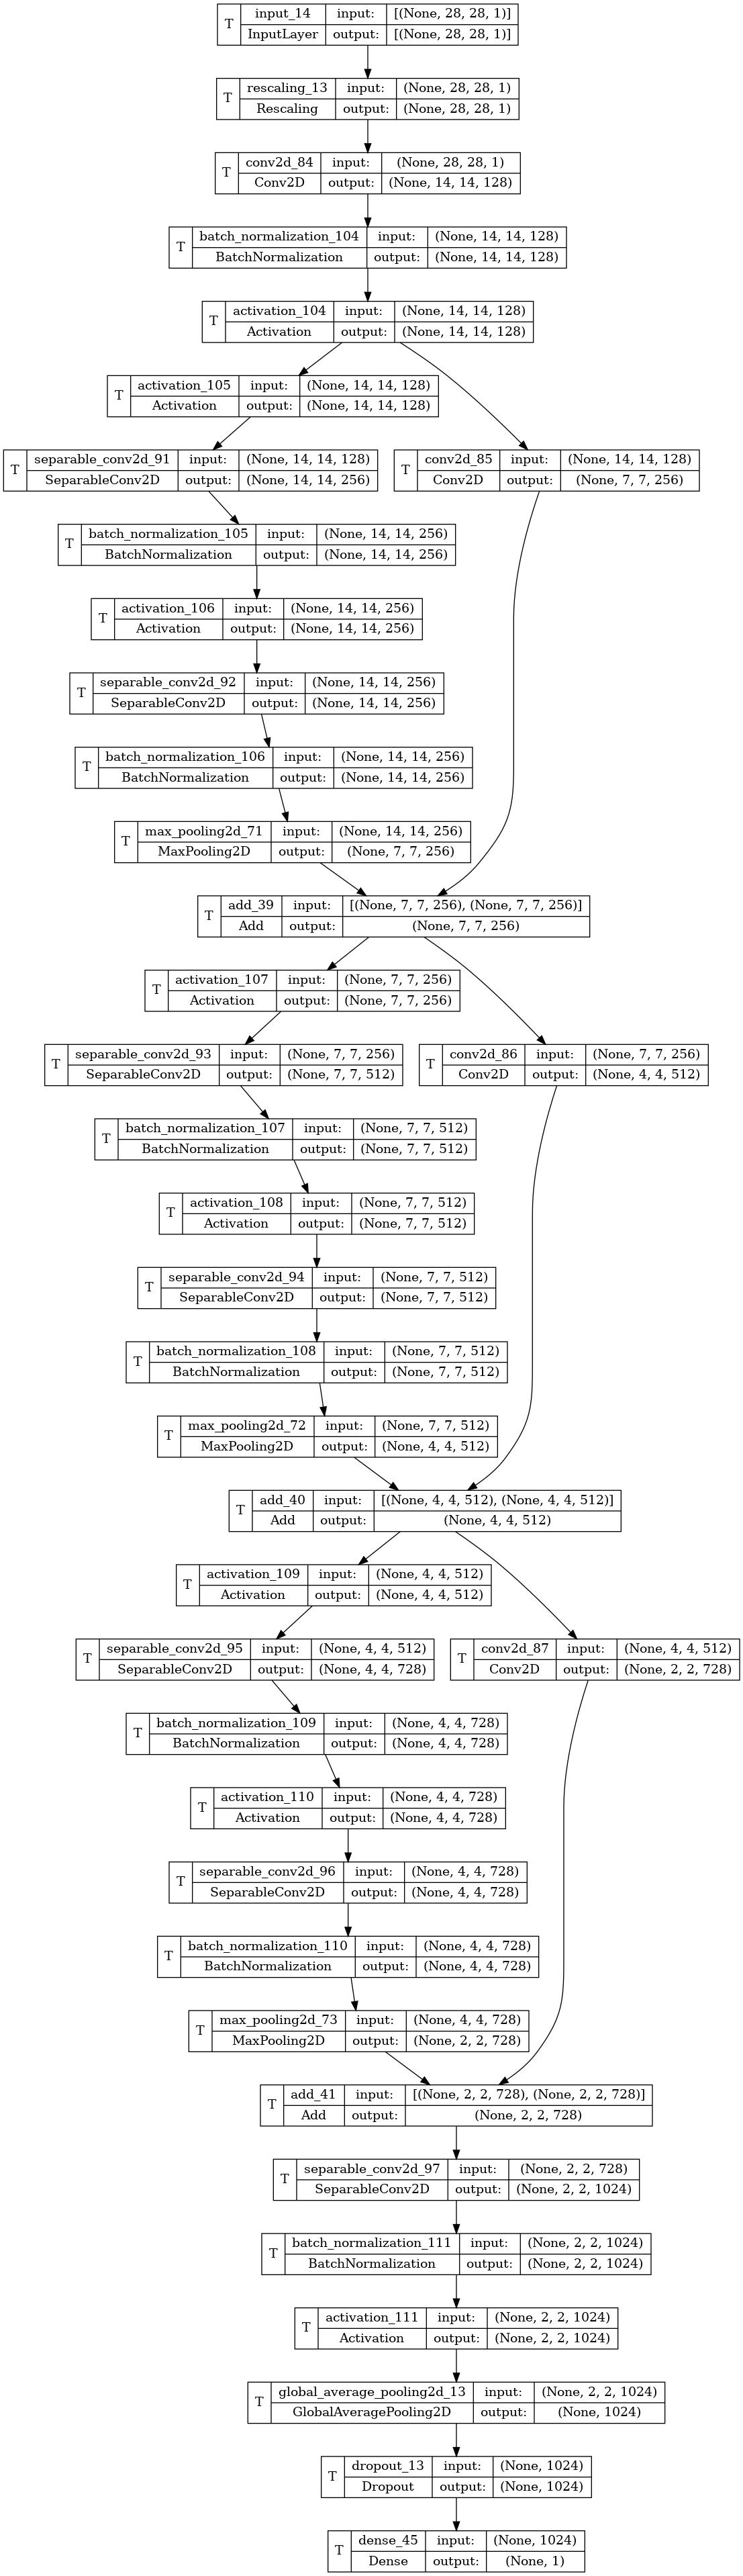

In [213]:
#Build the neural network why build it like this? see Khan and Gondhi, #

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(10, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax') 
])

#these lines of code tell python to plot a figure in the notebook, and then save this as 'model.jpg' showing the neural network#
image_size = (28, 28)
model = make_model(input_shape=image_size + (1,), num_classes=24)
keras.utils.plot_model(model, to_file="model.jpg", show_shapes=True, show_trainable=True)


In [216]:
#Train the model#
callback_checkpoint = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history = model.fit(x_train, validation_data=x_test, epochs=2, callbacks=[callback_checkpoint])
accuracy, val_accuracy = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs_trained = range(len(accuracy))

# Generate accuracy and loss graphs
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('Accuracy, Loss.png')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()